## Full analysis of a sample tested positive to the sapovirus GI.1 during a non-foodborne outbreak in Miyagi-Japan


We initially mapped these reads to the Nashville Reference sequence
Here, we curated the outbreak consensus and re-mapped the reads to outbreak consensus

In [1]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/")

### 1-index reference for mapping

In [2]:
%%bash
echo "GANBATTE! KTE"
echo "reference indexed"

# index ref
bwa index cons_2015k4.fa

GANBATTE! KTE
reference indexed


[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa index cons_2015k4.fa
[main] Real time: 0.218 sec; CPU: 0.008 sec


### 2-Map reads to reference

In [3]:
%%bash
bwa mem -t 32  cons_2015k4.fa 8_S8_L001_R1_001.fastq.gz 8_S8_L001_R2_001.fastq.gz | samtools view -b -F 4 -F 2048 | samtools sort -o 8_japan_GI.1.sorted.bam
echo "mapping completed"

mapping completed


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 1287612 sequences (167663604 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (122, 608258, 116, 111)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (530, 1474, 3043)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 8069)
[M::mem_pestat] mean and std.dev: (1982.98, 1659.73)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 10582)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (75, 115, 172)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 366)
[M::mem_pestat] mean and std.dev: (129.18, 69.71)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 463)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (408, 1360, 2891)
[M::mem_pestat] l

In [4]:
%%bash
ls

8_japan_GI.1.sorted.bam
8_S8_L001_R1_001.fastq.gz
8_S8_L001_R2_001.fastq.gz
cons_2015k4.fa
cons_2015k4.fa.amb
cons_2015k4.fa.ann
cons_2015k4.fa.bwt
cons_2015k4.fa.fai
cons_2015k4.fa.pac
cons_2015k4.fa.sa
cons_2015k4.gff
Primalprimers_SaVGI.1_batch2_ok.fa
Primal-primers_SaVGI.1pairs_ok.tsv
script-ivar-8_japan.sh


In [5]:
%%bash
samtools flagstat 8_japan_GI.1.sorted.bam

1230213 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
1230213 + 0 mapped (100.00% : N/A)
1230213 + 0 paired in sequencing
616409 + 0 read1
613804 + 0 read2
1216216 + 0 properly paired (98.86% : N/A)
1222894 + 0 with itself and mate mapped
7319 + 0 singletons (0.59% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### 3-Let's now trim-off the primer sequences using ivar. 
In order to do this we need three files: (1) a BED file with primer coordinates. We will generate this by aligning the primer sequences to the reference sequence and then using bedtools to create the BED file. We also neet (2) Aligned and (3) sorted BAM file generate in the previous step.


In [6]:
# map primers to the reference genome to identify primers coordinates

In [7]:
%%bash
bwa mem -k 5 -T 16 cons_2015k4.fa Primalprimers_SaVGI.1_batch2_ok.fa  | samtools view -b -F 4 > Primalprimers_SaVGI.1_batch2_ok.fa.bam
bedtools bamtobed -i Primalprimers_SaVGI.1_batch2_ok.fa.bam > 8_japan_GI.1_primers.bed
echo "bed file with primers locations on reference sequence generated"

bed file with primers locations on reference sequence generated


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1520 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.015 CPU sec, 0.015 real sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa mem -k 5 -T 16 cons_2015k4.fa Primalprimers_SaVGI.1_batch2_ok.fa
[main] Real time: 0.017 sec; CPU: 0.018 sec


In [8]:
# We will now use this BED file as input to ivar to trim primer sequences

# Note that this BED file has to be generated only once for a reference sequence.

In [9]:
%%bash
ivar trim -b 8_japan_GI.1_primers.bed -p 8_japan_GI.1.trimmed -i 8_japan_GI.1.sorted.bam
echo "primers trimming complete"
# Sort and index trimmed BAM file.
samtools sort -o 8_japan_GI.1.trimmed.sorted.bam 8_japan_GI.1.trimmed.bam ; samtools index 8_japan_GI.1.trimmed.sorted.bam
echo "Sorted and indexed trimmed BAM file"


Number of references: 1
Reference Name: cons_2015k4
Reference Length: 7384
Using Region: cons_2015k4
Sorted By Coordinate
Sorted By Query Name
Processed 1000000 reads ... 
Results: 
Trimmed primers from 315171 reads.
61568 reads were shortened below the minimum length of 30 bp and were not writen to file.
875750 reads that started outside of primer regions were not written to file.
primers trimming complete
Sorted and indexed trimmed BAM file


[E::idx_find_and_load] Could not retrieve index file for '8_japan_GI.1.sorted.bam'


In [10]:
%%bash
samtools flagstat 8_japan_GI.1.trimmed.sorted.bam

292895 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
292895 + 0 mapped (100.00% : N/A)
292895 + 0 paired in sequencing
152610 + 0 read1
140285 + 0 read2
290338 + 0 properly paired (99.13% : N/A)
291579 + 0 with itself and mate mapped
1316 + 0 singletons (0.45% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### 4-Let's quicky take a look at the depth of the trimmed vs untrimmed BAM file. We'll extract the depth using the samtools depth command.


In [11]:
%%bash
mkdir depth
samtools depth -a 8_japan_GI.1.trimmed.sorted.bam > depth/8_japan_GI.1.trimmed.sorted.bam.depth ; samtools depth -a 8_japan_GI.1.sorted.bam > depth/8_japan_GI.1.sorted.bam.depth
echo "Please plot the depth per position"

Please plot the depth per position


In [12]:
## Plot of the depth per position

In [13]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/depth")

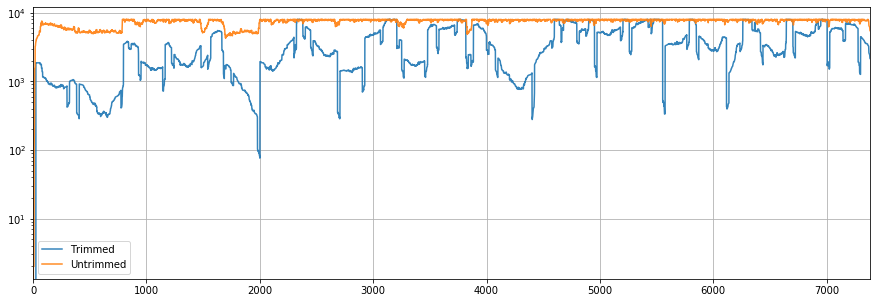

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df_trimmed = pd.read_csv("8_japan_GI.1.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_t"])
df_untrimmed = pd.read_csv("8_japan_GI.1.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unt"])

ax = df_trimmed["depth_t"].plot(logy=True, label = "Trimmed", figsize = (15,5), alpha = 0.9)
df_untrimmed["depth_unt"].plot(logy=True, ax = ax, label ="Untrimmed", alpha=0.9)
plt.legend()
plt.grid()
plt.show()

### 5-Let us identify primer sequences that might have a mismatch with the consensus sequence to ensure that we remove reads from any amplicons derived from those primers; Otherwise, it might bias the iSNV frequency due to varying primer binding effeciency

In [15]:
#To that end, we have to : 

#Call consensus on merged BAM file (If the sequencing of each technical replicate was done separately).

#Align primer sequences to consensus after creating a bwa index from the consensus sequence called.

In [16]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/")

In [17]:
%%bash
# a-call consensus
samtools mpileup -A -d 0 -Q 0 8_japan_GI.1.trimmed.sorted.bam  | ivar consensus -p 8_japan_GI.1.consensus
echo "consensus called on BAM file."


Minimum Quality: 20
Threshold: 0
Minimum depth:  
Regions with depth less than minimum depth covered by: -
consensus called on BAM file.


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [18]:
%%bash
# Map primers to the indexed consensus sequence
bwa index -p 8_japan_GI.1.consensus 8_japan_GI.1.consensus.fa
bwa mem -k 5 -T 16 8_japan_GI.1.consensus Primalprimers_SaVGI.1_batch2_ok.fa  | samtools view -bS -F 4 | samtools sort -o 8_japan_GI.1_primers_consensus.bam

echo "primers mapped to consensus"

primers mapped to consensus


[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa index -p 8_japan_GI.1.consensus 8_japan_GI.1.consensus.fa
[main] Real time: 0.449 sec; CPU: 0.008 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1520 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.016 CPU sec, 0.016 real sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa mem -k 5 -T 16 8_japan_GI.1.consensus Primalprimers_SaVGI.1_batch2_ok.fa
[main] Real time: 0.018 sec; CPU: 0.019 sec


In [19]:
%%bash
# "Let's now call iSNVs on this BAM file at a minimum threshold of 3% and the default minimum quality threshold of 20"
samtools mpileup -A -d 0  -Q 0 8_japan_GI.1_primers_consensus.bam | ivar variants -p 8_japan_GI.1_primers_consensus_1 -t 0.03 -r 8_japan_GI.1.consensus.fa -g cons_2015k4.gff

echo "iSNVs on this initial BAM (without removal of reads from mismached primers) called at a minimum threshold of 3%"


iSNVs on this initial BAM (without removal of reads from mismached primers) called at a minimum threshold of 3%


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [20]:
%%bash
# Let's now get the indices of primers with mismtaches and their respective pairs. To get the pair information, we need a tsv file with two columns to represent the pairs of primers. This file is at pair_information.tsv
bedtools bamtobed -i 8_japan_GI.1_primers_consensus.bam > 8_japan_GI.1_primers_consensus.bam.bed ; ivar getmasked -i 8_japan_GI.1_primers_consensus_1.tsv -b 8_japan_GI.1_primers_consensus.bam.bed -f Primal-primers_SaVGI.1pairs_ok.tsv -p primer_mismatchers_indices
echo "you got the indices of primers with mismtaches and their respective pairs"


Primer pair for KTESAVG11_2_LEFT not found in BED file.
Primer pair for KTESAVG11_4_LEFT not found in BED file.
Primer pair for KTESAVG11_5_LEFT not found in BED file.
Primer pair for KTESAVG11_7_LEFT not found in BED file.
Primer pair for KTESAVG11_8_LEFT not found in BED file.
Primer pair for KTESAVG11_9_LEFT not found in BED file.
Primer pair for KTESAVG11_11_RIGHT not found in BED file.
Primer pair for KTESAVG11_12_RIGHT not found in BED file.
Primer pair for KTESAVG11_13_RIGHT not found in BED file.
Primer pair for KTESAVG11_14_RIGHT not found in BED file.
Primer pair for KTESAVG11_15_RIGHT not found in BED file.
Primer pair for KTESAVG11_16_RIGHT not found in BED file.
Primer pair for KTESAVG11_17_RIGHT not found in BED file.
Primer pair for KTESAVG11_18_RIGHT not found in BED file.
Primer pair for KTESAVG11_19_RIGHT not found in BED file.
Primer pair for KTESAVG11_20_RIGHT not found in BED file.
Primer pair for KTESAVG11_21_RIGHT not found in BED file.
Primer pair for KTESAVG11_

### 6- Let's omit reads from mismatched primers (Masking)

In [21]:
%%bash
ivar removereads -i 8_japan_GI.1.trimmed.sorted.bam -p 8_japan_GI.1.bad_are_masked.bam -t primer_mismatchers_indices.txt -b 8_japan_GI.1_primers.bed
echo "you removed reads from mismatched primers"

Writing to 8_japan_GI.1.bad_are_masked.bam
Number of references: 1
Reference Name: cons_2015k4
Reference Length: 7384
Using Region: cons_2015k4
Sorted By Coordinate
Results:
112245 reads were removed.
you removed reads from mismatched primers


In [22]:
%%bash
samtools flagstat 8_japan_GI.1.bad_are_masked.bam

180650 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
180650 + 0 mapped (100.00% : N/A)
180650 + 0 paired in sequencing
94368 + 0 read1
86282 + 0 read2
179083 + 0 properly paired (99.13% : N/A)
179953 + 0 with itself and mate mapped
697 + 0 singletons (0.39% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [23]:
%%bash
# let us take a look at the reads distribution before and after masking
samtools sort -o 8_japan_GI.1.bad_are_masked.sorted.bam 8_japan_GI.1.bad_are_masked.bam 
samtools depth -a 8_japan_GI.1.bad_are_masked.sorted.bam > depth/8_japan_GI.1.bad_are_masked.sorted.depth

# echo "Let's now call iSNVs from the BAMS without reads from the masked amplicons"

samtools mpileup -A -d 0 --reference cons_2015k4.fa -Q 0 8_japan_GI.1.bad_are_masked.sorted.bam | ivar variants -p 8_japan_GI.1_final -t 0.03 -r cons_2015k4.fa -g cons_2015k4.gff ; tput setaf 1 echo "analysis is completed"
echo "please exclude variants with depth <400 and count iSNV"

please exclude variants with depth <400 and count iSNV


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [24]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/depth")

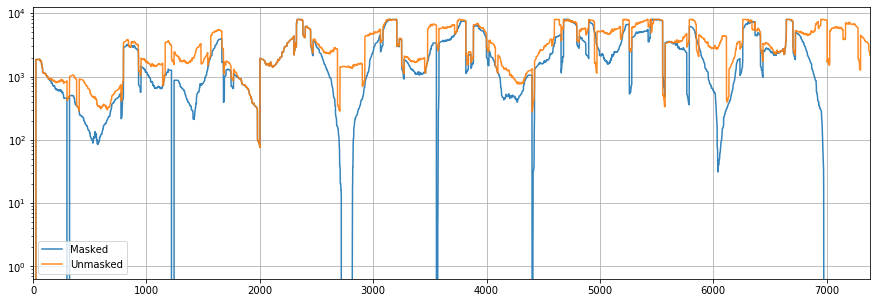

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df_unmasked = pd.read_csv("8_japan_GI.1.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unmask"])
df_masked = pd.read_csv("8_japan_GI.1.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])

ax = df_masked["depth_mask"].plot(logy=True, label = "Masked", figsize = (15,5), alpha = 0.9)
df_unmasked["depth_unmask"].plot(logy=True, ax = ax, label ="Unmasked", alpha=0.9)
plt.legend()
plt.grid()
plt.show()

#### 7- View Tables and Plots

In [26]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/")

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rep_a = pd.read_csv("8_japan_GI.1_final.tsv", sep="\t")
rep_a["S_NS"] = np.where(rep_a["REF_AA"] == rep_a["ALT_AA"], "S", "NS")
rep_a.head()

,REGION,POS,REF,ALT,REF_DP,REF_RV,REF_QUAL,ALT_DP,ALT_RV,ALT_QUAL,ALT_FREQ,TOTAL_DP,PVAL,PASS,GFF_FEATURE,REF_CODON,REF_AA,ALT_CODON,ALT_AA,S_NS
0,cons_2015k4,656,G,A,0,0,0,204,204,37,1.000000,204,1.920650e-122,True,NaN,GGA,G,GAA,E,NS
1,cons_2015k4,1161,C,A,719,564,37,193,192,36,0.211623,912,4.821030e-69,True,NaN,GGC,G,GGA,G,S
2,cons_2015k4,1308,G,+T,673,0,38,21,0,20,0.030837,681,3.207970e-03,True,NaN,NaN,NaN,NaN,NaN,NS
3,cons_2015k4,3132,C,T,73,55,38,6758,5321,40,0.989313,6831,0.000000e+00,True,NaN,ACC,T,ACT,T,S
4,cons_2015k4,3468,C,T,983,692,37,199,198,34,0.168359,1182,3.479640e-70,True,NaN,GTC,V,GTT,V,S


In [28]:
rep_b=rep_a[rep_a['TOTAL_DP'] >= 400]
shape = rep_b.shape 
shape

(7, 20)

IndexError: invalid index to scalar variable.

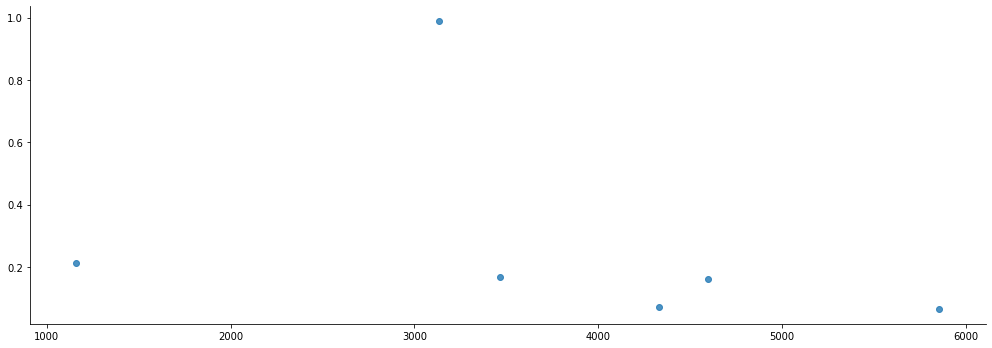

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rep_b=rep_a[rep_a['TOTAL_DP'] >= 400]
sns.lmplot( x="POS", y="ALT_FREQ", data=rep_b, fit_reg=False, hue='S_NS',aspect=14/5, 
           legend=True, legend_out=True)
plt.xlabel('Genome position', fontsize=15)
plt.ylabel('iSNV frequency', fontsize=15)
plt.title('iSNVs in sample 8_japan vs outbreak_consensus', fontsize=20)
plt.grid(axis="both")
plt.show()

In [ ]:
# let us filter snps in non structural region [1-5099]
print("snps in non structural region")
print((rep_b[(rep_b['POS'] > 3610) & (rep_b['POS'] < 5099)]).shape)
# let us filter snps in complete capsid[5010-6800]
print("snps in capsid")
print((rep_b[(rep_b['POS'] > 5100) & (rep_b['POS'] < 7350)]).shape)

In [ ]:
# what percentage of this masked genome (without reads from mismached primers) has depth >400 ? 
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped-share/2015k4/8_japan/depth")
df_masked = pd.read_csv("8_japan_GI.1.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])
df_masked['400cov'] = np.where(df_masked['depth_mask']>=400, 'yes', 'no')
df_masked['100cov'] = np.where(df_masked['depth_mask']>=100, 'yes', 'no')
df_masked.head()

In [ ]:
# What proportion of the genome is has a depth of coverage of at least >100 reads, >400 (Breadth ofcoverage)
my_tab1 = pd.crosstab(index=df_masked["100cov"],  # Make a crosstab
                              columns="Breadth 100coverage")      # Name the count column
my_tab2 = pd.crosstab(index=df_masked["400cov"],  # Make a crosstab
                              columns="Beadth above 400coverage")      # Name the count column
shape=df_masked.shape
print(shape)
print(my_tab1); print(my_tab2)

In [ ]:
5941/7388 * 100 # proportion of genome covered >400

In [ ]:
6697/7388 * 100 # proportion of genome covered >100